Valores nulos restantes: 0

Tipos de dados atualizados:
dataset_name                                                                                                                                         object
sampleID                                                                                                                                             object
subjectID                                                                                                                                            object
bodysite                                                                                                                                             object
disease                                                                                                                                              object
                                                                                                                                                     ...   
k__Bacte

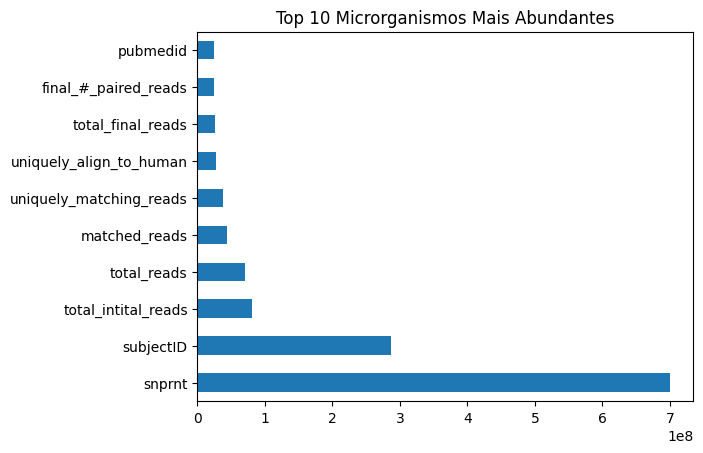

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o dataset com configurações otimizadas
df = pd.read_csv(
    "C:/Users/Rodrigo/Downloads/ProjetoDM/abundance.csv",
    dtype={'sampleID': str, 'subjectID': str},  # Especificar tipos para colunas conhecidas
    low_memory=False
)

# 2. Função para tratamento seguro de cada coluna
def process_column(series):
    if pd.api.types.is_numeric_dtype(series):
        # Para colunas numéricas: substituir 0 por NaN e preencher com mediana
        series = series.replace(0, np.nan)
        return series.fillna(series.median())
    else:
        # Para colunas não numéricas: preencher com o valor mais frequente
        return series.fillna(series.mode()[0])

# 3. Aplicar o processamento de forma vetorizada
df = df.apply(process_column, axis=0)

# 4. Verificação final
print("Valores nulos restantes:", df.isnull().sum().sum())
print("\nTipos de dados atualizados:")
print(df.dtypes)

# Filtra/converte colunas para garantir que são numéricas
numeric_data = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))  # Converte não-numéricos para NaN
numeric_cols = numeric_data.columns[~numeric_data.isna().all()]  # Pega colunas com pelo menos algum número válido

# Calcula a média e plota
if len(numeric_cols) > 0:
    top_microbes = numeric_data[numeric_cols].mean().sort_values(ascending=False).head(10)
    top_microbes.plot(kind='barh', title='Top 10 Microrganismos Mais Abundantes')
    plt.show()
else:
    print("Nenhuma coluna numérica encontrada para cálculo de médias.")